In [1]:
import sys
if '/home/rossco/immunova' not in sys.path:
    sys.path.append('/home/rossco/immunova')
from immunova.data.mongo_setup import pd_init
from immunova.data.fcs_experiments import FCSExperiment
from immunova.flow.gating.actions import Gating, Template
from immunova.flow.gating.defaults import ChildPopulationCollection
from warnings import filterwarnings
from tqdm import tqdm_notebook
import matplotlib
import pandas as pd
import os
filterwarnings('ignore')
pd_init()

/home/rossco/immunova/env/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/home/rossco/immunova/env/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
texp = FCSExperiment.objects(experiment_id='PD_T_PBMCs').get()

In [3]:
t = Template(texp, '305-03_pbmc_t', include_controls=False)

In [4]:
t.load_template('PBMCt_Preprocessing')

True

Applying boundary...
------ boundary ------
New population: cells
...proportion of total events: 0.690
...proportion of parent: 0.690
New population: debris
...proportion of total events: 0.310
...proportion of parent: 0.310
-----------------------
Applying CD3_gate...
------ CD3_gate ------
New population: CD3+
...proportion of total events: 0.185
...proportion of parent: 0.268
New population: CD3-
...proportion of total events: 0.505
...proportion of parent: 0.732
-----------------------
Applying live_gate...
------ live_gate ------
New population: dead
...proportion of total events: 0.009
...proportion of parent: 0.049
New population: live
...proportion of total events: 0.176
...proportion of parent: 0.951
-----------------------
Applying singlets1_gate...
------ singlets1_gate ------
New population: singlets1
...proportion of total events: 0.176
...proportion of parent: 0.999
New population: doublets1
...proportion of total events: 0.000
...proportion of parent: 0.001
-------------

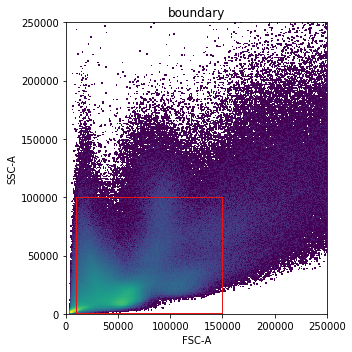

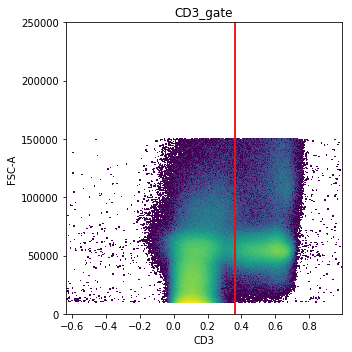

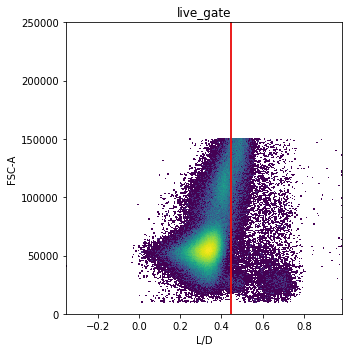

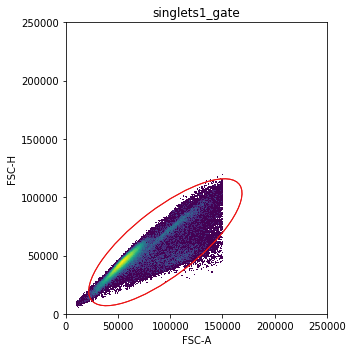

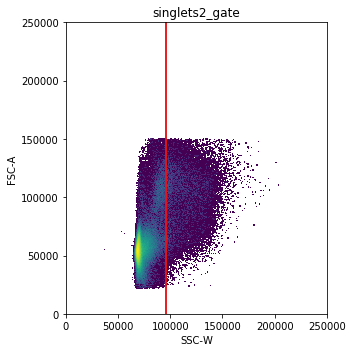

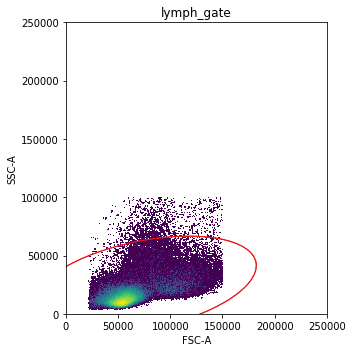

In [5]:
t.apply_many(apply_all=True, plot_outcome=True)

In [13]:
t.populations['Lymphocytes'].geom

{'centroid': (75242.26376952295, 24830.96960007754),
 'width': 31986.63871038771,
 'height': 34775.162053619744,
 'angle': 100.00707793155644,
 'shape': 'ellipse',
 'x': 'FSC-A',
 'y': 'SSC-A'}

In [10]:
new_geom = t.populations['Lymphocytes'].geom
new_geom['width'] = new_geom['width']*0.65
new_geom['height'] = new_geom['height']*0.4
new_geom = {'Lymphocytes': new_geom, 'other cells': new_geom}

In [11]:
t.edit_gate('lymph_gate', updated_geom=new_geom)

Editing gate: lymph_gate
Updating Lymphocytes
Updating other cells
The following gates are downstream of lymph_gate and will need to be applied again: []
Edit complete!


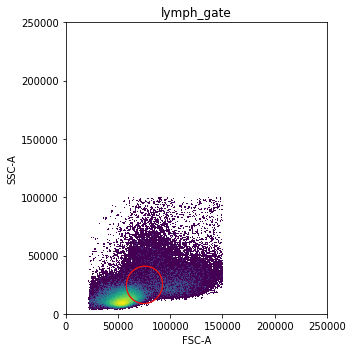

In [12]:
t.plotting.plot_gate('lymph_gate')

In [ ]:
t.save(overwrite=True)